In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

def clean_timeline(df):
    df2 = df.dropna()
    df_cleaned = df2[["timeBegin","latitude","longitude"]]
    result = df_cleaned.rename(columns={"timeBegin":"time"})
    return result


In [2]:
folder = '/home/yutong.zhao/Downloads/google_timeline_export-20231120T152058Z-001/google_timeline_export'

fns = os.listdir(folder)

print(fns)

['2020-07-01_2020-12-31.csv', '2023-01-01_2023-06-30.csv', '2018-01-01_2018-06-30.csv', '2021-07-01_2021-12-31.csv', '2023-07-01_2023-11-24_algo.csv', '2022-01-01_2022-06-30.csv', '2017-01-01_2017-06-30.csv', '2017-07-01_2017-12-31.csv', '2021-01-01_2021-06-30.csv', '2022-07-01_2022-12-31.csv', '2019-07-01_2019-12-31.csv', '2019-01-01_2019-06-30.csv', '2018-07-01_2018-12-31.csv', '2023-01-01_2023-06-30_algo.csv', '2020-01-01_2020-06-30.csv', '2023-07-01_2023-11-24.csv']


In [3]:
n = 0
for fn in fns:
    df = pd.read_csv(folder +'/'+ fn)
    if n == 0:
        dfw = clean_timeline(df)
    else:
        dfw = pd.concat([dfw, clean_timeline(df)], ignore_index=True)

    n +=1

In [4]:
dfw

,time,latitude,longitude
0,2020-07-02T20:21:55.007Z,49.822206,-97.206598
1,2020-07-02T21:30:08.492Z,49.796817,-97.164145
2,2020-07-03T13:47:42.002Z,49.796817,-97.164145
3,2020-07-03T16:08:12.997Z,49.810622,-97.134719
4,2020-07-03T22:56:39.124Z,49.796817,-97.164145
...,...,...,...
6817,2023-11-20T22:06:41.000Z,45.478609,-73.660451
6818,2023-11-21T17:12:24.836Z,45.475806,-73.666105
6819,2023-11-21T22:07:59.999Z,45.478609,-73.660451
6820,2023-11-22T19:31:09.709Z,45.478609,-73.660451


In [5]:
y = dfw['latitude']
x = dfw['longitude']

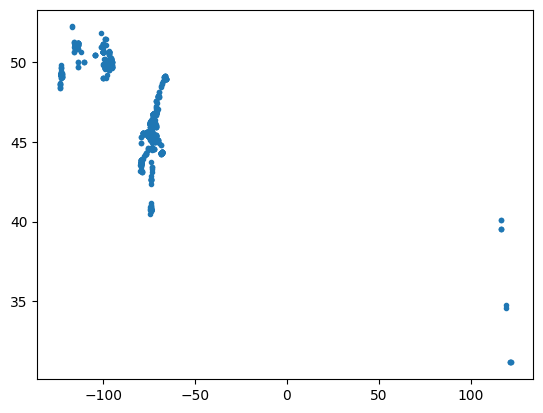

In [6]:
plt.plot(x,y,'.')

In [7]:
dff = dfw.sort_values(by=['time'])
dff.to_csv('timeline.csv', index=False)

In [8]:
import plotly.graph_objects as go

# df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
# df['text'] = df['airport'] + '' + df['city'] + ', ' + df['state'] + '' + 'Arrivals: ' + df['cnt'].astype(str)

fig = go.Figure(data=go.Scattergeo(
        lat = dfw['latitude'],
        lon = dfw['longitude'],
        text = dfw['time'],
        mode = 'markers',
        # marker_color = df['cnt'],
        ))

fig.update_layout(
        title = 'Yutong Footprint)',
        # geo_scope='north america',
        geo_scope='world',
    )
fig.show()